In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Load Dataset**

In [14]:
df = pd.read_csv('../input/netflix-analaysis/netflix_6241 (1) (1).csv')
df.head()

,show_id,type,title,Director,Cast,genre,age_rating,downloads,Seasons,running_time,Language,IMDb_rating,Views,year,rating
0,11101,Movie,Dick Johnson Is Dead,Almodóvar Pedro,Banderas Antonio,Action,U/A 13+,114.0,NaN,90.0,Hindi,7.5,Trillion,2016,PG-13
1,11102,TV Show,Blood & Water,Almodóvar Pedro,Bosé Miguel,Comedy,U/A 16+,NaN,2.0,NaN,English,8.1,Billion,2021,TV-MA
2,11103,TV Show,PGanPGlands,Cronenberg David,Walken Christopher,Drama,U/A 13+,113.0,1.0,NaN,English,8.7,Trillion,2009,TV-MA
3,11104,TV Show,Jailbirds New Orleans,Lester Richard,Connery Sean,Action,A,137.0,1.0,NaN,Hindi,5.3,Million,2000,TV-MA
4,11105,TV Show,Kota Factory,Malick Terrence,Gere Richard,Thriller,U,152.0,2.0,NaN,English,8.7,Billion,2000,TV-MA


In [15]:
df.set_index('show_id',inplace=True)
df.head()

,type,title,Director,Cast,genre,age_rating,downloads,Seasons,running_time,Language,IMDb_rating,Views,year,rating
show_id,,,,,,,,,,,,,,
11101,Movie,Dick Johnson Is Dead,Almodóvar Pedro,Banderas Antonio,Action,U/A 13+,114.0,NaN,90.0,Hindi,7.5,Trillion,2016,PG-13
11102,TV Show,Blood & Water,Almodóvar Pedro,Bosé Miguel,Comedy,U/A 16+,NaN,2.0,NaN,English,8.1,Billion,2021,TV-MA
11103,TV Show,PGanPGlands,Cronenberg David,Walken Christopher,Drama,U/A 13+,113.0,1.0,NaN,English,8.7,Trillion,2009,TV-MA
11104,TV Show,Jailbirds New Orleans,Lester Richard,Connery Sean,Action,A,137.0,1.0,NaN,Hindi,5.3,Million,2000,TV-MA
11105,TV Show,Kota Factory,Malick Terrence,Gere Richard,Thriller,U,152.0,2.0,NaN,English,8.7,Billion,2000,TV-MA


In [16]:
df.tail()

,type,title,Director,Cast,genre,age_rating,downloads,Seasons,running_time,Language,IMDb_rating,Views,year,rating
show_id,,,,,,,,,,,,,,
13401,Movie,The Perfect Picture: Ten Years Later,NaN,Kurtz Swoosie,Drama,U/A 13+,116.0,NaN,148.0,English,8.1,Billion,2019,TV-MA
13402,TV Show,Supermarket Sweep,NaN,Kyô Machiki,Drama,U/A 13+,11.0,1.0,NaN,English,5.7,hundred,2017,TV-PG
13403,Movie,ThiaPGo Ventura: POKAS,NaN,Ladd Diane,Action,U/A 16+,87.0,NaN,82.0,English,5.8,Million,2005,TV-MA
13404,TV Show,Warrior Nun,NaN,Ladd Diane,Drama,U/A 13+,158.0,1.0,NaN,English,3.5,hundred,2000,TV-MA
13405,Movie,#AnneFrank - Parallel Stories,NaN,Lahti Christine,Drama,U/A 13+,154.0,NaN,95.0,English,3.6,hundred,2019,TV-14


* **Number of rows and columns**

In [17]:
df.shape

(2305, 14)

 * **Data type of each Coulmns.**

In [ ]:
df.columns

Analyzing the numerial datas.

In [18]:
df.describe()

,downloads,Seasons,running_time,IMDb_rating,year
count,1537.000000,803.000000,1504.000000,2123.000000,2305.000000
mean,101.592062,1.950187,100.706782,6.774093,2013.000868
std,48.186292,1.713962,27.648801,1.897078,7.180764
min,1.000000,1.000000,1.000000,1.000000,1997.000000
25%,84.000000,1.000000,90.000000,5.800000,2008.000000
50%,118.000000,1.000000,101.000000,7.500000,2015.000000
75%,136.000000,2.000000,115.000000,8.100000,2019.000000
max,204.000000,17.000000,273.000000,9.100000,2022.000000


data Information

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2305 entries, 11101 to 13405
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          2305 non-null   object 
 1   title         2305 non-null   object 
 2   Director      1406 non-null   object 
 3   Cast          2297 non-null   object 
 4   genre         2305 non-null   object 
 5   age_rating    2305 non-null   object 
 6   downloads     1537 non-null   float64
 7   Seasons       803 non-null    float64
 8   running_time  1504 non-null   float64
 9   Language      2305 non-null   object 
 10  IMDb_rating   2123 non-null   float64
 11  Views         2305 non-null   object 
 12  year          2305 non-null   int64  
 13  rating        2305 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 270.1+ KB


* **Dropping Duplicate Records**

In [20]:
df.drop_duplicates()

,type,title,Director,Cast,genre,age_rating,downloads,Seasons,running_time,Language,IMDb_rating,Views,year,rating
show_id,,,,,,,,,,,,,,
11101,Movie,Dick Johnson Is Dead,Almodóvar Pedro,Banderas Antonio,Action,U/A 13+,114.0,NaN,90.0,Hindi,7.5,Trillion,2016,PG-13
11102,TV Show,Blood & Water,Almodóvar Pedro,Bosé Miguel,Comedy,U/A 16+,NaN,2.0,NaN,English,8.1,Billion,2021,TV-MA
11103,TV Show,PGanPGlands,Cronenberg David,Walken Christopher,Drama,U/A 13+,113.0,1.0,NaN,English,8.7,Trillion,2009,TV-MA
11104,TV Show,Jailbirds New Orleans,Lester Richard,Connery Sean,Action,A,137.0,1.0,NaN,Hindi,5.3,Million,2000,TV-MA
11105,TV Show,Kota Factory,Malick Terrence,Gere Richard,Thriller,U,152.0,2.0,NaN,English,8.7,Billion,2000,TV-MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13401,Movie,The Perfect Picture: Ten Years Later,NaN,Kurtz Swoosie,Drama,U/A 13+,116.0,NaN,148.0,English,8.1,Billion,2019,TV-MA
13402,TV Show,Supermarket Sweep,NaN,Kyô Machiki,Drama,U/A 13+,11.0,1.0,NaN,English,5.7,hundred,2017,TV-PG
13403,Movie,ThiaPGo Ventura: POKAS,NaN,Ladd Diane,Action,U/A 16+,87.0,NaN,82.0,English,5.8,Million,2005,TV-MA


* **Number of null value present in each columns**

In [21]:
df.isnull().sum()

type               0
title              0
Director         899
Cast               8
genre              0
age_rating         0
downloads        768
Seasons         1502
running_time     801
Language           0
IMDb_rating      182
Views              0
year               0
rating             0
dtype: int64

# Heatmap

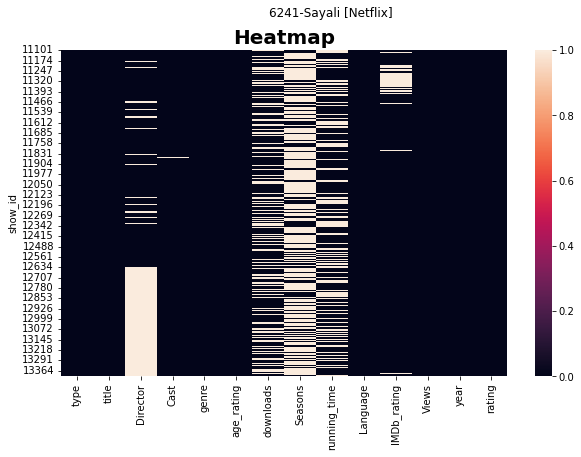

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.suptitle('6241-Sayali [Netflix]')
plt.title('Heatmap',fontdict={'fontsize':20},fontweight="bold")
plt.show()

*A heatmap contains values representing various shades of the same colour for each value to be plotted*

# Histplot

**Types of Shows in Netflix.**

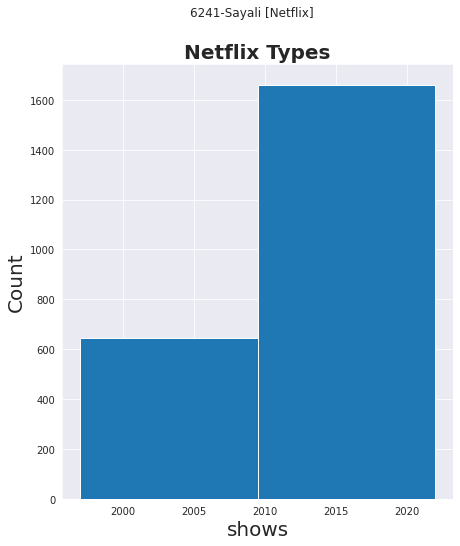

In [24]:
plt.figure(figsize=(7,8))
sns.set_style('darkgrid')
plt.hist(x='year',bins=2,data=df)
plt.xlabel('shows',fontdict={'fontsize':20},)
plt.ylabel('Count',fontdict={'fontsize':20})
plt.suptitle('6241-Sayali [Netflix]')
plt.title('Netflix Types',fontdict={'fontsize':20},fontweight="bold")
plt.show()

*This histplot describe about types of shows in netflix and There count also. From  Count and type on x axis we conclude that number of Movie shows are more than number of TV shows in this netflix dataset.*

# Countplot

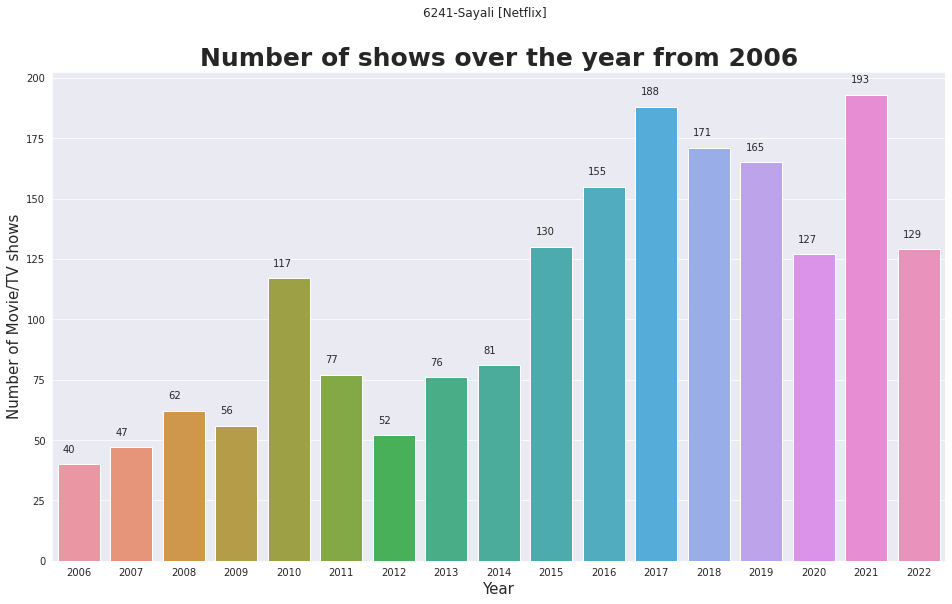

In [25]:
plt.figure(figsize=(16,9))
sns.set_style('darkgrid')
ax=sns.countplot(x=df[df.year>2005].year,data=df)
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+0.1,i.get_height()+5))
plt.title('Number of shows over the year from 2006',fontdict={'fontsize':25},fontweight="bold")
plt.xlabel('Year',fontdict={'fontsize':15})
plt.ylabel('Number of Movie/TV shows',fontdict={'fontsize':15})
plt.suptitle('6241-Sayali [Netflix]')
plt.show()

*Count plot shows Number of shows over the year, Acoording to condition no of shows over the year from 2006 is given. From countplot we conclude that highest count of no. of shows is 193 in the year 2021 and least count is 41 no.of shows in year 2006.*

# Barplot

**Genres Present In Netflix.**

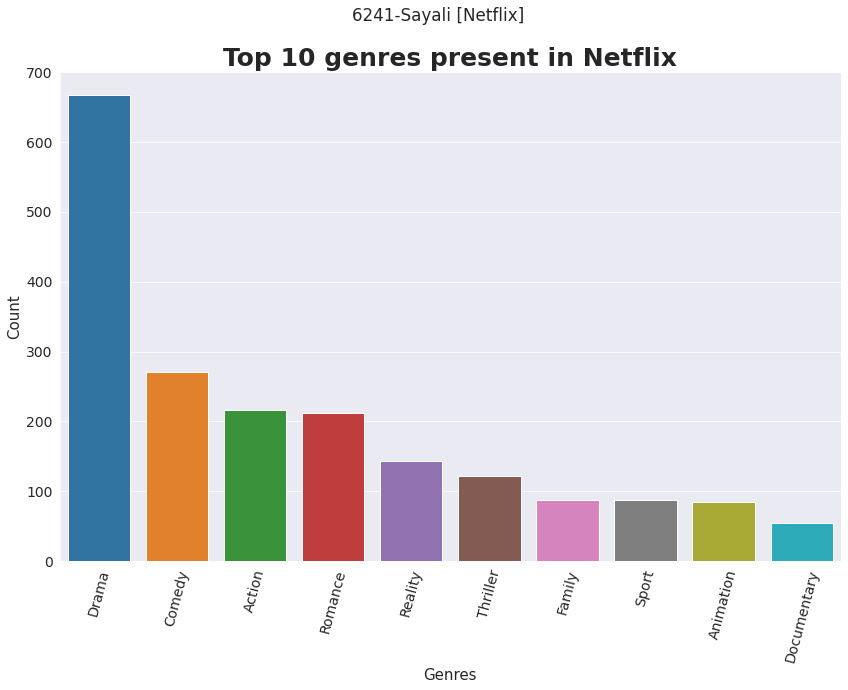

In [26]:
data= df.genre.value_counts()[:10]
plt.figure(figsize=(14,9))
plt.rcParams['font.size'] = 14
sns.set_style('darkgrid')
sns.barplot(x=data.index,y=data)
plt.title('Top 10 genres present in Netflix',fontdict={'fontsize':25},fontweight="bold")
plt.xlabel('Genres',fontdict={'fontsize':15})
plt.ylabel('Count',fontdict={'fontsize':15})
plt.xticks(rotation=75)
plt.suptitle('6241-Sayali [Netflix]')
plt.show()

*Bar plot,In netflix more than 10 genre are present. Genres are which describe what type of show that is. From this count bar plot shows Top 10 Genres of the dataset. Drama is highest one and Documentary is at 10th position*

# Boxplot

**Different Language present in dataset comparing with Downloads.**

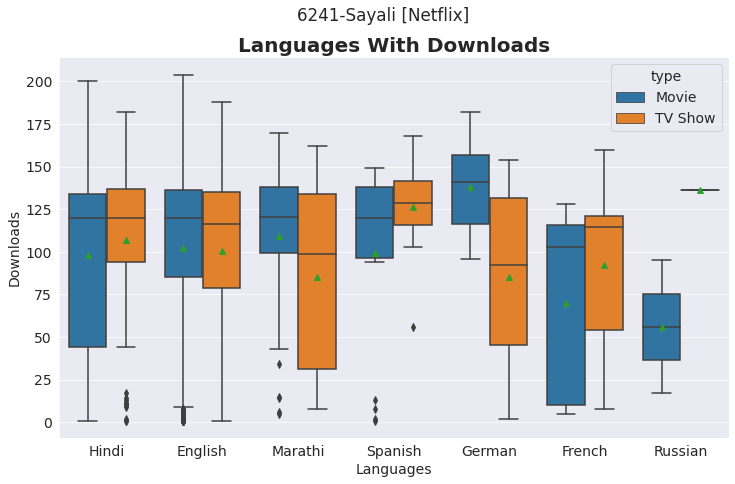

In [27]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Language',y='downloads',hue='type',showmeans=True,data=df)
plt.xlabel('Languages')
plt.ylabel('Downloads')
plt.title('Languages With Downloads',fontdict={'fontsize':20},fontweight="bold")
plt.suptitle('6241-Sayali [Netflix]')
plt.show()

*Box plot, In this we are  calculating value from Languages and Downloads . From this we conclude that no of downloads for German languages movies count highest and  Spanish language for tv shows*

# Stripplot

*Rating over the year.**

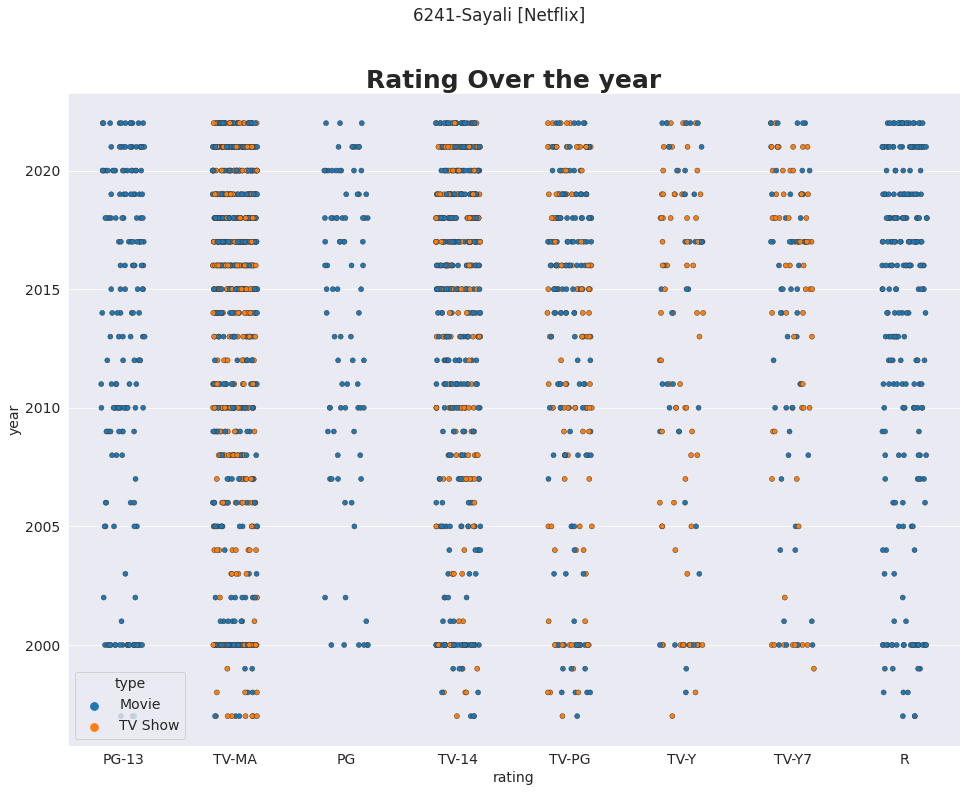

In [28]:
plt.figure(figsize=(16,12))
sns.stripplot(x='rating', y='year',data=df,jitter=0.2,linewidth=0.5,hue='type')
plt.title('Rating Over the year',fontdict={'fontsize':25},fontweight="bold")
plt.suptitle('6241-Sayali [Netflix]')
plt.show()

*Stripplot it represents age rating over the year with type of shows. accrding to plot TV-MA mature audiance that is 18+ audiance rating is increasing over the year, movie rating is higher in it. age rating for the PG that is parent guidance is lowest.*

# Pie chart

**Views Count.**

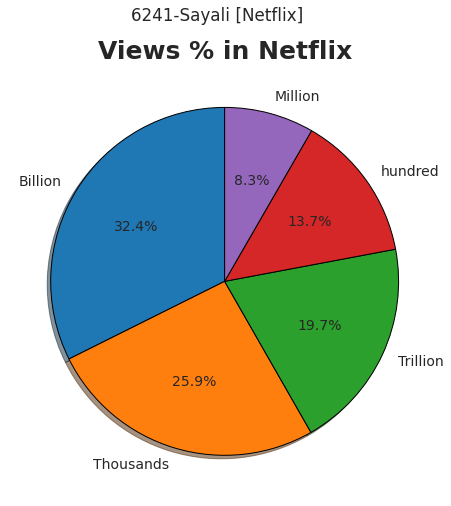

In [29]:
plt.figure(figsize=(8,8))
data = df.Views.value_counts()
plt.pie(data,labels=data.index,shadow=True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Views % in Netflix',fontdict={'fontsize':25},fontweight="bold")
plt.suptitle('6241-Sayali [Netflix]')
plt.show()

*Pie Chart gives percentage of the given data, and it slices represents the percentage of the parts of the data. In this pie chart represents the views percentage. Highest percentage views are Thousands views whose count is 25.9% and lowest  are Millions views whose count is 8.3%*

# Swarmplot

**Age rating with Running Time.**

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


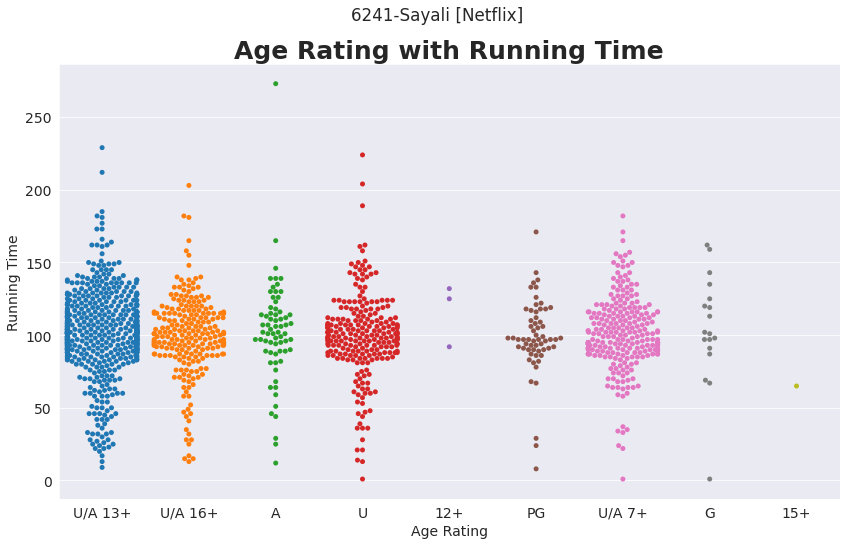

In [30]:
plt.figure(figsize=(14,8))
sns.swarmplot(x='age_rating',y='running_time',data=df)
plt.xlabel('Age Rating')
plt.ylabel('Running Time')
plt.title('Age Rating with Running Time',fontdict={'fontsize':25},fontweight="bold")
plt.suptitle('6241-Sayali [Netflix]')
plt.show()

In this plot age rating and running time is used. From this we can conclude that audiance 13+ age are watching movie with highest running time

# Wordcloud

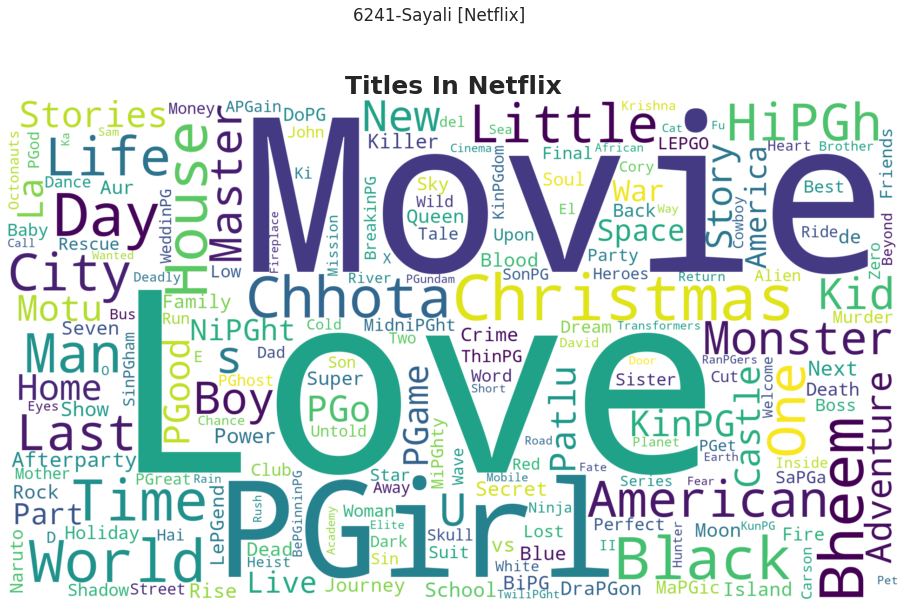

In [31]:
from wordcloud import WordCloud
image1 = " ".join(i for i in df['title'])
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 1920, height = 1080).generate(image1)
plt.figure(figsize=(16,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.title('Titles In Netflix',fontdict={'fontsize':25},fontweight="bold")
plt.axis('off')
plt.suptitle('6241-Sayali [Netflix]')
plt.show()

*Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance LOVE has highest Frequency.*

# Lineplot

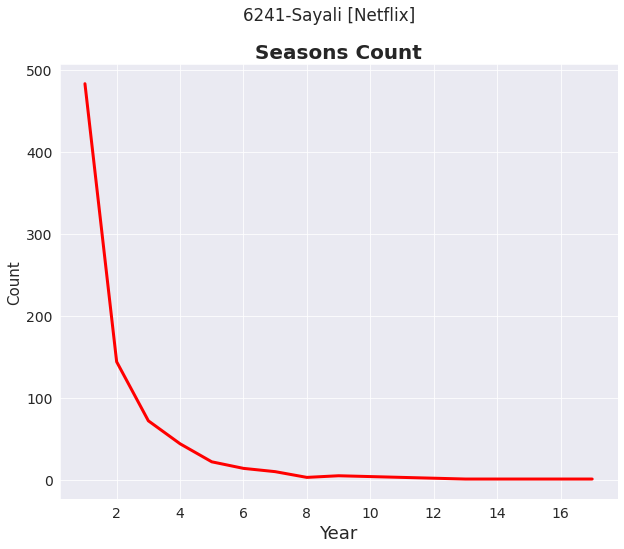

In [32]:
plt.figure(figsize=(10,8))
data=df.Seasons.value_counts()
sns.lineplot( x=data.index, y=data,color='r',linewidth=3)
plt.title('Seasons Count',fontdict={'fontsize':20},fontweight="bold")
plt.xlabel('Year',fontdict={'fontsize':18},)
plt.ylabel('Count',fontdict={'fontsize':15})
plt.suptitle('6241-Sayali [Netflix]')
plt.show()

*Lineplot Gives Count Of Seasons Of TV shows. Season 1 has highest Count and From Season 12 Count is Constant*

This is my edited dataset for project point of view only.thankk  you.